In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import pandas as pd
sys.path.insert(1, '../')
import qtm.visualize
import importlib
importlib.reload(qtm.visualize)

<module 'qtm.visualize' from '..\\qtm\\visualize.py'>

### Comparing between number of layers (QNG optimizer)

In [20]:
path = "../../experiments/binho_ansatz_15layer/"
dirs = os.listdir(path)
dirs = list(map(int, dirs))
dirs.sort()

In [15]:
fidelitiesghz, fidelitiesw, fidelitieshaar, tracesghz, tracesw, traceshaar = qtm.visualize.read_15layer(path, dirs)

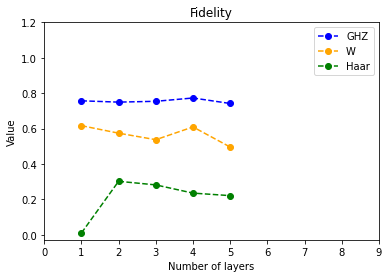

In [16]:
qtm.visualize.plot_15layer('Fidelity', fidelitiesghz, fidelitiesw, fidelitieshaar)

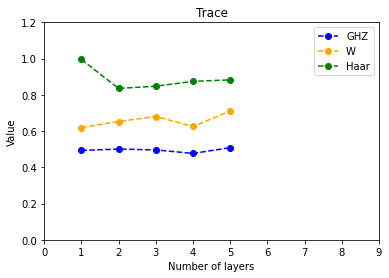

In [17]:
qtm.visualize.plot_15layer('Trace', tracesghz, tracesw, traceshaar)

In [21]:
fidelitiesghz, fidelitiesw, fidelitieshaar, tracesghz, tracesw, traceshaar = qtm.visualize.read_15layer_last(path, dirs)

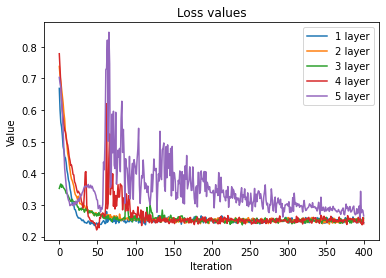

In [23]:
for dir in dirs:
    dir = str(dir)
    ghz = pd.read_csv(path + dir + "/loss_values_ghz.csv", sep=",", header=None)
    plt.plot(ghz, label = dir + ' layer')
x = [1,2,3,4,5]
plt.title('Loss values')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
#plt.savefig('Compare_num_layer_GHZ.png', format='png', dpi=600)
plt.show()

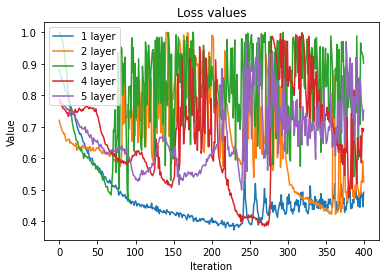

In [24]:
for dir in dirs:
    dir = str(dir)
    w = pd.read_csv(path + dir + "/loss_values_w.csv", sep=",", header=None)
    plt.plot(w, label = dir + ' layer')
x = [1,2,3,4,5]
plt.title('Loss values')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
#plt.savefig('Compare_num_layer_GHZ.png', format='png', dpi=600)
plt.show()

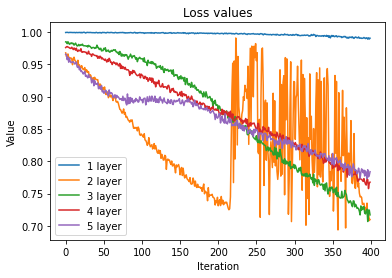

In [25]:
for dir in dirs:
    dir = str(dir)
    haar = pd.read_csv(path + dir + "/loss_values_haar.csv", sep=",", header=None)
    plt.plot(haar, label = dir + ' layer')
x = [1,2,3,4,5]
plt.title('Loss values')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
#plt.savefig('Compare_num_layer_GHZ.png', format='png', dpi=600)
plt.show()

### Comparing between number of layers (Adam optimizer)

In [26]:
path = "../../experiments/binho_ansatz_15layer_adam/"
dirs = os.listdir(path)
dirs = list(map(int, dirs))
dirs.sort()

In [27]:
fidelitiesghz, fidelitiesw, fidelitieshaar, tracesghz, tracesw, traceshaar = qtm.visualize.read_15layer(path, dirs)

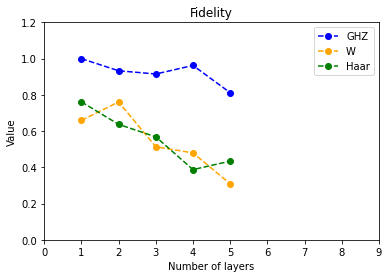

In [28]:
qtm.visualize.plot_15layer('Fidelity', fidelitiesghz, fidelitiesw, fidelitieshaar)

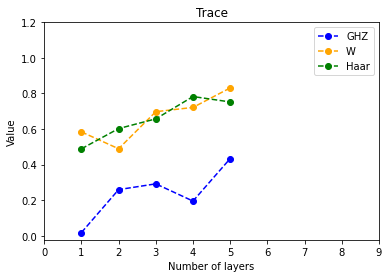

In [29]:
qtm.visualize.plot_15layer('Trace', tracesghz, tracesw, traceshaar)

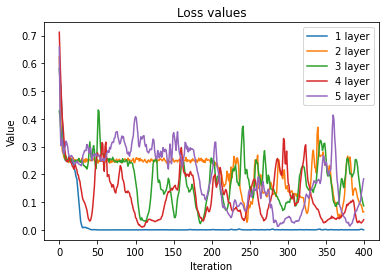

In [30]:
for dir in dirs:
    dir = str(dir)
    ghz = pd.read_csv(path + dir + "/loss_values_ghz.csv", sep=",", header=None)
    plt.plot(ghz, label = dir + ' layer')
x = [1,2,3,4,5]
plt.title('Loss values')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
#plt.savefig('Compare_num_layer_GHZ.png', format='png', dpi=600)
plt.show()

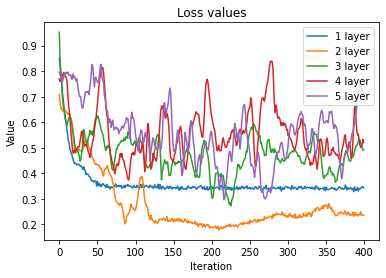

In [31]:
for dir in dirs:
    dir = str(dir)
    w = pd.read_csv(path + dir + "/loss_values_w.csv", sep=",", header=None)
    plt.plot(w, label = dir + ' layer')
x = [1,2,3,4,5]
plt.title('Loss values')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
#plt.savefig('Compare_num_layer_GHZ.png', format='png', dpi=600)
plt.show()

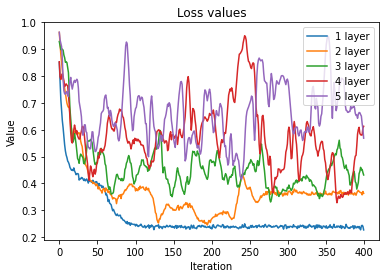

In [32]:
for dir in dirs:
    dir = str(dir)
    haar = pd.read_csv(path + dir + "/loss_values_haar.csv", sep=",", header=None)
    plt.plot(haar, label = dir + ' layer')
x = [1,2,3,4,5]
plt.title('Loss values')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
#plt.savefig('Compare_num_layer_GHZ.png', format='png', dpi=600)
plt.show()

### Comparing number of layer (QNG-Adam optimizer)

In [33]:
path = "../../experiments/binho_ansatz_15layer_qngadam/"
dirs = os.listdir(path)
dirs = list(map(int, dirs))
dirs.sort()

In [34]:
fidelitiesghz, fidelitiesw, fidelitieshaar, tracesghz, tracesw, traceshaar = qtm.visualize.read_15layer(path, dirs)

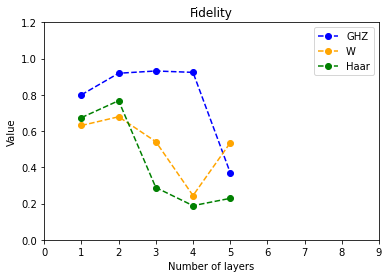

In [35]:
qtm.visualize.plot_15layer('Fidelity', fidelitiesghz, fidelitiesw, fidelitieshaar)

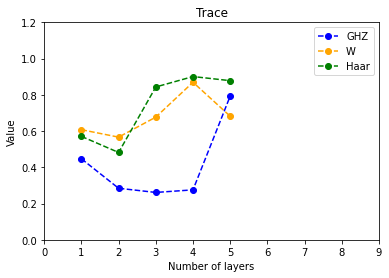

In [36]:
qtm.visualize.plot_15layer('Trace', tracesghz, tracesw, traceshaar)

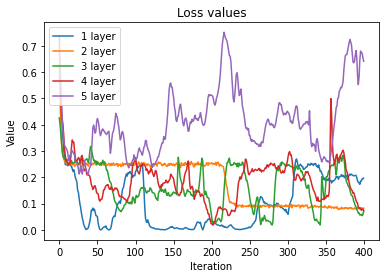

In [37]:
for dir in dirs:
    dir = str(dir)
    ghz = pd.read_csv(path + dir + "/loss_values_ghz.csv", sep=",", header=None)
    plt.plot(ghz, label = dir + ' layer')
x = [1,2,3,4,5]
plt.title('Loss values')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
#plt.savefig('Compare_num_layer_GHZ.png', format='png', dpi=600)
plt.show()

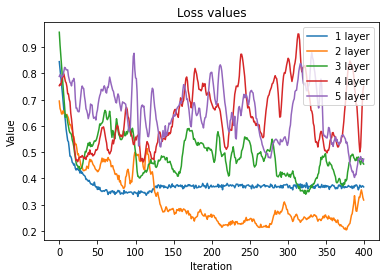

In [38]:
for dir in dirs:
    dir = str(dir)
    w = pd.read_csv(path + dir + "/loss_values_w.csv", sep=",", header=None)
    plt.plot(w, label = dir + ' layer')
x = [1,2,3,4,5]
plt.title('Loss values')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
#plt.savefig('Compare_num_layer_GHZ.png', format='png', dpi=600)
plt.show()

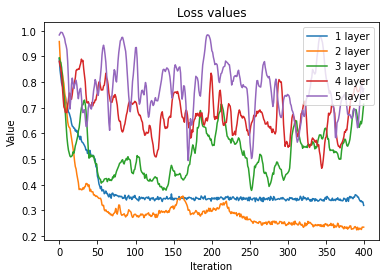

In [39]:
for dir in dirs:
    dir = str(dir)
    haar = pd.read_csv(path + dir + "/loss_values_haar.csv", sep=",", header=None)
    plt.plot(haar, label = dir + ' layer')
x = [1,2,3,4,5]
plt.title('Loss values')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
#plt.savefig('Compare_num_layer_GHZ.png', format='png', dpi=600)
plt.show()